In [1]:
%run create_stop_freq.py

In [2]:
analysis_dt = dt.date(2022,6,1)
analysis_sat = dt.date(2022,6,4)
analysis_sun = dt.date(2022,6,5)

selected_agencies = ['LA Metro', 'Salinas', 'SBMTD']

In [3]:
weekday_feeds_data, weekday_trips_data, weekday_stoptimes_data, weekday_stopsdata = get_feeds_trips_stops_data(selected_agencies, analysis_dt)
sun_feeds_data, sun_trips_data, sun_stoptimes_data, sun_stopsdata = get_feeds_trips_stops_data(selected_agencies, analysis_sun)
sat_feeds_data, sat_trips_data, sat_stoptimes_data, sat_stopsdata = get_feeds_trips_stops_data(selected_agencies, analysis_sat)

/opt/conda/lib/python3.9/site-packages/sqlalchemy_bigquery/_types.py:101: SAWarning: Did not recognize type 'INTERVAL' of column 'arrival_time_interval'
  sqlalchemy.util.warn(
/opt/conda/lib/python3.9/site-packages/sqlalchemy_bigquery/_types.py:101: SAWarning: Did not recognize type 'INTERVAL' of column 'departure_time_interval'
  sqlalchemy.util.warn(
/opt/conda/lib/python3.9/site-packages/sqlalchemy_bigquery/_types.py:101: SAWarning: Did not recognize type 'INTERVAL' of column 'start_pickup_drop_off_window_interval'
  sqlalchemy.util.warn(
/opt/conda/lib/python3.9/site-packages/sqlalchemy_bigquery/_types.py:101: SAWarning: Did not recognize type 'INTERVAL' of column 'end_pickup_drop_off_window_interval'
  sqlalchemy.util.warn(
/opt/conda/lib/python3.9/site-packages/sqlalchemy_bigquery/_types.py:101: SAWarning: Did not recognize type 'GEOGRAPHY' of column 'pt_geom'
  sqlalchemy.util.warn(
/opt/conda/lib/python3.9/site-packages/sqlalchemy_bigquery/_types.py:101: SAWarning: Did not rec

In [4]:
#Joining trips and stops
stop_times_weekday = merge_and_aggregate_stops_and_trips(weekday_trips_data, weekday_stoptimes_data, agg_prefix='weekday')
stop_times_sunday = merge_and_aggregate_stops_and_trips(sun_trips_data, sun_stoptimes_data, agg_prefix='sunday')
stop_times_saturday = merge_and_aggregate_stops_and_trips(sat_trips_data, sat_stoptimes_data, agg_prefix='saturday')

In [5]:
#Joining stop_times and stops_geo
stop_weekday = merge_stops(stop_times_weekday, weekday_stopsdata, ["stop_id", "feed_key"])
stop_sunday = merge_stops(stop_times_sunday, sun_stopsdata, ["stop_id", "feed_key"])
stop_saturday = merge_stops(stop_times_saturday, sat_stopsdata, ["stop_id", "feed_key"])

In [6]:
merge_cols = ["feed_key","route_type", "stop_id","geometry", "stop_code", "stop_name", "location_type"]
final_cols = ["name","feed_key","location_type","route_type","stop_name","stop_id","stop_code","geometry","n_trips_weekday","n_trips_saturday","n_trips_sunday","n_routes_weekday","n_routes_saturday","n_routes_sunday"]

In [7]:
stoptimes_all = merge_stoptimes(stop_weekday, stop_saturday, stop_sunday, merge_cols, final_cols)

/home/jovyan/data-analyses/ahsc_grant/untitled.py:116: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  merged_df = pd.merge(stoptimes_weekday, stoptimes_sat, on=merge_cols, how="outer")
/home/jovyan/data-analyses/ahsc_grant/untitled.py:117: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  merged_df = pd.merge(merged_df, stoptimes_sun, on=merge_cols, how="outer")


In [8]:
stoptimes_all = (stoptimes_all
                     >> filter(_.route_type=="3")
                    )

In [10]:
valid_weekday_data = stoptimes_all[pd.notnull(stoptimes_all['n_trips_weekday'])]
valid_saturday_data = stoptimes_all[pd.notnull(stoptimes_all['n_trips_saturday'])]
valid_sunday_data = stoptimes_all[pd.notnull(stoptimes_all['n_trips_sunday'])]

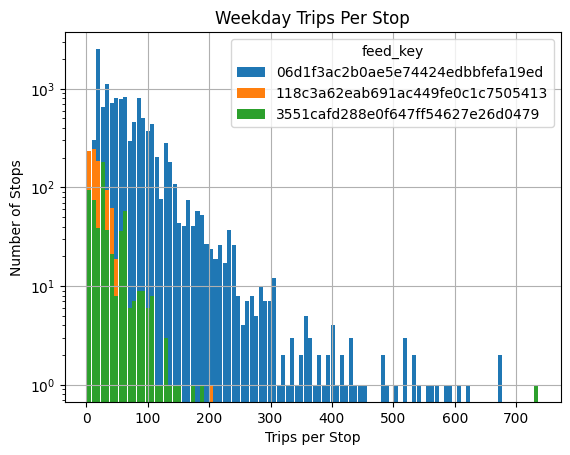

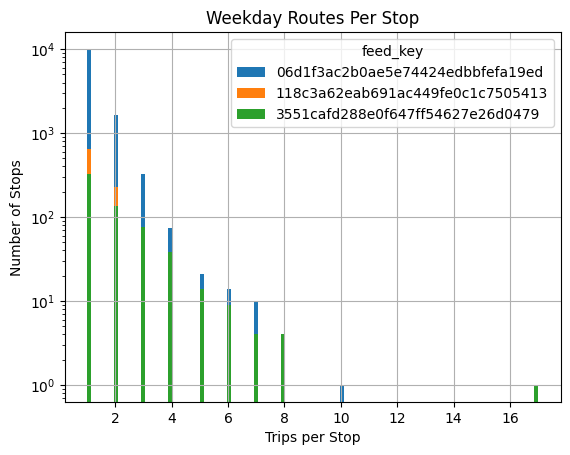

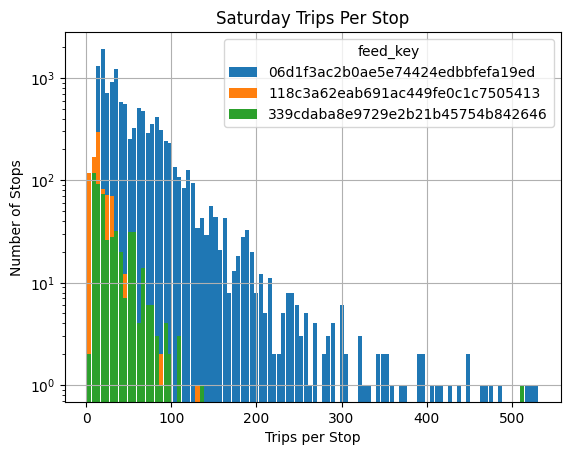

In [11]:
plot_histogram(valid_weekday_data, 'n_trips_weekday', 'Weekday Trips Per Stop')
plot_histogram(valid_weekday_data, 'n_routes_weekday', 'Weekday Routes Per Stop')
plot_histogram(valid_saturday_data, 'n_trips_saturday', 'Saturday Trips Per Stop')

In [ ]:
sns.lmplot(x="n_routes_weekday",y="n_trips_weekday", hue="feed_key", data=valid_weekday_data).set(title="weekday routes vs trips")